<a href="https://colab.research.google.com/github/ocelotzin/Tareas_analisis_numerico/blob/main/Tarea1/Ejercicio2/Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Tarea 1 Analisis Numerico</i></h1>
  </font>
  <font color="Blue" face="Comic Sans MS,arial">
  <h5 align="center"><i>MARTINEZ ROSAS ZAYDE YAMILE</i></h5>
  <h5 align="center"><i>CAMACHO MARIN ANA KAREN</i></h5>
  <h5 align="center"><i>LÓPEZ AGUIRRE ROBERTO OCELOTZIN</i></h5>
  <h5 align="center"><i>VARGAS BAUTISTA EMMANUEL</i></h5>
  </font>

In [ ]:
#Librerias

import numpy as np
import matplotlib.pyplot as plt
import timeit
import time

#Ejercicio 2


##Ejercicio 2.1


In [ ]:
## cramer.py ##
# Aplica la regla de cramer para resolver sistemas de ecuaciones
# en una matriz que determinamos como mat, y un vector vec.

# importamos numpy y el módulo de álgebra lineal
import numpy as np
from numpy import linalg

# definimos el tamaño de la matriz n*n
n = 3

def RempCol(Mat, Vec, j):
    """
    Toma una matriz y remplaza la j-ésima columna por
    el vector determinado Vec.

    Parámetros:
    -----------
    Mat : numpy.ndarray
        Una matriz bidimensional de n filas por n columnas
    Vec : numpy.ndarray
        Un arreglo unidimensional de largo n por el que va
        a ser reemplazada la columna elegida
    i   : int
        Un natural que determina la j-ésima columna a reemplazar

    Retorna:
    --------
    numpy.ndarray:
        Una matriz de m por n cuya j-ésima columna ha sido reemplazada
        por Vec.
    """

    # Inicializamos la matriz resultante
    MatR = np.zeros((n,n))

    # Si la matriz, vector y número de entrada
    # no cumplen con los parámetros documentados se levanta una excepción.
    assert(np.shape(Mat) == (n, n))
    assert(np.shape(Vec) == (n,))
    assert(j <= n)
    assert(j > 0)

    #Copiamos por columnas
    for p in range(n):
        #Si la columna es la j-ésima, la reemplazamos por Vec.
        if p == j-1:
            for q in range(n):
                MatR[q,p] = Vec[q]
        else:
            for q in range(n):
                MatR[q,p] = Mat[q,p]


    #Regresamos el resultante
    return MatR

def Cramer(Mat, Vec, j):
    """
    Aplica la regla de cramer para el sistema Mat*x = Vec
    devolviendo el j-ésimo elemento del vector x.

    Parámetros:
    -----------

    Mat : numpy.ndarray
        Una matriz bidimensional cuadrada de lado n
    Vec : numpy.ndarray
        Un vector unidimensional de largo n
    j   : int
        Un natural que determina el componente
        j-ésimo del vector resultante

    Retorna:
    --------

    float64
        Un número que es componente j-ésimo del vector x.
    """

    # Obtenemos el determinante de la matriz de entrada
    detA = np.linalg.det(A)

    # Si el determinante es cero no podemos continuar
    if detA == 0:
        raise Exception("Determinante igual a cero. No se puede computar con Cramer.")
    else:
        xj = np.linalg.det(RempCol(Mat, Vec, j)) / detA

    # Si se puede calcular lo regresa, si no lanza una excepción:
    return(xj)


# Ejemplo con la matriz A y el vector v
A = np.array([[2.0, 0.0, 4.0],
              [0.0, 3.0, 3.0],
              [1.0, 0.0, 0.0]])
v = np.array([3.0, 2.0, 1.0])

print("Matriz de entrada: \n", A)
print("Vector de entrada: \n", v)

print("Vamos a resolver el sistema conformado por estos dos:")

# Inicializamos el vector respuesta
Res = np.zeros(n)

# Computamos Cramer para cada entrada
for k in range(n):
    Res[k] = Cramer(A, v, k+1)

print("############\nResultado:\n", Res)


##Ejercicicio 2.2


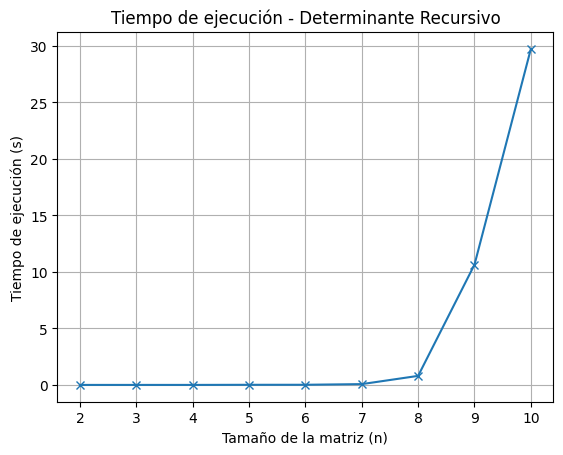

In [ ]:
def Det(Mat):
    if Mat.shape[0] == 2 and Mat.shape[1] == 2:
        return Mat[0][0] * Mat[1][1] - (Mat[0][1] * Mat[1][0])
    deter = 0.0
    for col in range(Mat.shape[0]):
        deter += ((-1) ** col) * Mat[0][col] * Det(np.delete(np.delete(Mat, 0, axis=0), col, axis=1))
    return deter

sizes = range(2, 11, 1)
det_times = []

for n in sizes:
    A = 2 * np.eye(n) + np.diag(-1 * np.ones(n-1), k=1) + np.diag(-1 * np.ones(n-1), k=-1)
    start = time.perf_counter()
    Det(A)
    end = time.perf_counter()
    det_times.append(end - start)

plt.plot(sizes, det_times, marker='x')
plt.xlabel('Tamaño de la matriz (n)')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('Tiempo de ejecución - Determinante Recursivo')
plt.grid()
plt.show()

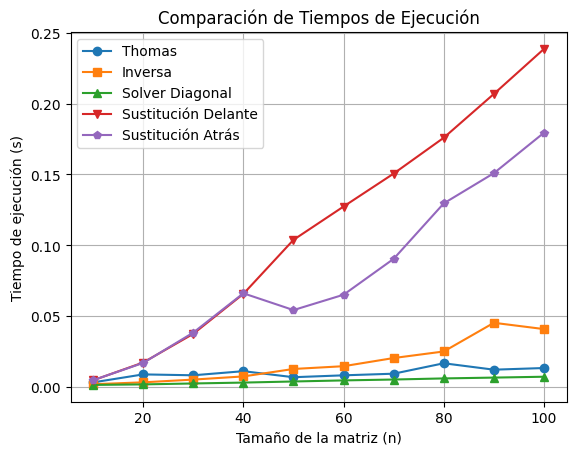

In [ ]:


# Algoritmo de Thomas
def Thomas(DP, DS, DI, b):
    n = len(DP)
    x = np.zeros(n)
    for i in range(1, n):
        DP[i] = DP[i] - (DI[i-1] / DP[i-1]) * DS[i-1]
    x[-1] = b[-1] / DP[-1]
    for i in range(n-2, -1, -1):
        x[i] = (b[i] - DS[i] * x[i+1]) / DP[i]
    return x

# Solución por Inversa
def SolveInv(Mat, vec):
    InvMat = np.linalg.inv(Mat)
    return InvMat @ vec

# Solver Diagonal
def SolverDiagonal(A, b):
    n = len(A)
    x = np.zeros_like(A, dtype=float)
    for i in range(n):
        x[i] = b[i] / A[i]
    return x

# Sustitución Hacia Delante
def SustitucionDelante(Mat, b):
    n = Mat.shape[0]
    x = np.zeros(n)
    for i in range(n):
        SumCum = 0.0
        for j in range(i):
            SumCum += Mat[i, j] * x[j]
        x[i] = (b[i] - SumCum) / Mat[i, i]
    return x

# Sustitución Hacia Atrás
def SustitucionAtras(Mat, b):
    n = Mat.shape[0]
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        SumCum = 0.0
        for j in range(i+1, n):
            SumCum += Mat[i, j] * x[j]
        x[i] = (b[i] - SumCum) / Mat[i, i]
    return x

sizes = range(10, 101, 10)

# Almacenar tiempos de ejecución
thomas_times = []
solveinv_times = []
solv_diag_times = []
sust_delante_times = []
sust_atras_times = []

for n in sizes:
    DP = 2 * np.ones(n)
    DS = -1 * np.ones(n-1)
    DI = -1 * np.ones(n-1)
    b = np.ones(n)
    A = 2 * np.eye(n) + np.diag(-1 * np.ones(n-1), k=1) + np.diag(-1 * np.ones(n-1), k=-1)

    # Thomas
    thomas_times.append(timeit.timeit(lambda: Thomas(DP.copy(), DS.copy(), DI.copy(), b.copy()), number=100))

    # Solución por Inversa
    solveinv_times.append(timeit.timeit(lambda: SolveInv(A, b), number=100))

    # Solver Diagonal
    solv_diag_times.append(timeit.timeit(lambda: SolverDiagonal(DP, b), number=100))

    # Sustitución hacia adelante
    L = np.tril(A)
    sust_delante_times.append(timeit.timeit(lambda: SustitucionDelante(L, b), number=100))

    # Sustitución hacia atrás
    U = np.triu(A)
    sust_atras_times.append(timeit.timeit(lambda: SustitucionAtras(U, b), number=100))

# Graficar todos los tiempos en una sola gráfica
plt.plot(sizes, thomas_times, marker='o', label='Thomas')
plt.plot(sizes, solveinv_times, marker='s', label='Inversa')
plt.plot(sizes, solv_diag_times, marker='^', label='Solver Diagonal')
plt.plot(sizes, sust_delante_times, marker='v', label='Sustitución Delante')
plt.plot(sizes, sust_atras_times, marker='p', label='Sustitución Atrás')

plt.xlabel('Tamaño de la matriz (n)')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('Comparación de Tiempos de Ejecución')
plt.legend()
plt.grid()
plt.show()

###**Analisis**

####**Explicacion de los problemas**



> El codigo no esta documentado ya que basicamente es lo de las ayudantias


Tenemos 2 problema a la hora de realizar el trabajo note varias cosas entre ellas podemos ver que segun donde se corra el codigo este puede cambiar el tiempo de los algoritmos al ser google collab un entorno donde no siempre tenemos los mismos parametros de ejecucion al ser un servicio en la nube no se puede alcanzar a notar del todo que como estos algoritmos cambian su tiempo de ejecucion deacuerdo al tiempo por lo que es ampliamente recomendable correrlos de manera local para apreciar esto, ahora el segundo problema que se me precento fue al momento de realizar el ejercicio para det, ya que este es muy complejo hablando computacionalmente i.e esto me llevo a realizar una demostracion para poder justificar el por que no lo agregue a la grafica final y lo resage al inicio igualmente al correrlo de nada va funcionar pero lo dejo ya que fue parte de las indicaciones, a continuacion agregare la demostracion que realice:

Primero notemos que e el número total de operaciones de recursión para calcular el determinante de una matriz $nxn$ es por definicion del algoritmo y no muy dificil de ver:

$$ T(n) = n \cdot T(n- 1) + O(n) $$

Notemos que $ O(n) $ viene de las operaciones necesarias para calcular la suma de los productos en la expansión de cofactores, y $ T(n-1) $ representa el costo de calcular el determinante de las submatrices $ (n-1) \times (n-1) $.

Apartir de este momento solo es aplicar recurrencia lo hare algo mas extenso para que se pueda llegar a comprender y visualizar el patron:

La recurrencia $ T(n) = n \cdot T(n-1) + O(n) $:

- $ T(n) = n \cdot T(n-1) + O(n) $
- $ T(n-1) = (n-1) \cdot T(n-2) + O(n-1) $
- $ T(n-2) = (n-2) \cdot T(n-3) + O(n-2) $

Si continuamos expandiendo recursivamente, llegamos a:

$$
T(n) = n \cdot (n-1) \cdot (n-2) \cdot \dots \cdot 2 \cdot T(1) + O(n!)
$$

Por lo tanto, la complejidad total es:

$$
T(n) = O(n!) + O(n!) = O(n!)
$$

Como podemos visualizar el orden de complejidad es factorial por que ni en un millon de años ibamos a poder realizar la comparativa que se nos pidio por lo que ahora si podemos continuar explicando que sucede con cada uno de los demas algoritmos.

#### **Analisis de los resultados**

Al ver la grafica de manera local podemos notar que solverdiagonal y thomas tienen un comportamiento muy similar por lo que podemos afirmar hasta cierto punto que tienen un orden de complejidad similar (sin realizar la demostracion pertinente), a su vez inversa tiene una complejidad similar al inicio aun que aproximadamente depues de matrices de 80x80 tenemos que pasas a tener un comportamiento gigantesco es decir a mi parecer seria algo de tipo exponencial

De la misma manera tanto sustitucion hacia atras como hacia delante tienen un comportamiento parecido entre ellos pero algo mas alto que los mencionados anteriormente



#Ejercicio 2.3


In [ ]:
## dosbandas.py ##
# Resuelve un sistema de ecuaciones a dos bandas,
# con la posibilidad de que sea la banda sobre la
# diagonal principal o la que está debajo.

# Podríamos proceder con el algoritmo de Thomas, pero
# vamos a intentar hacer un barrido hacia atrás o
# adelante dependiendo si es superior o inferior
# respectivamente.

# importamos numpy y el módulo de álgebra lineal
import numpy as np
from numpy import linalg as LA

# definimos el tamaño de la matriz n*n
n = 3

def DPrincipal(Mat):
    """
    Devuelve la diagonal principal

    Parámetro:
    ----------
    Mat : numpy.ndarray
        Una matriz n por n

    Retorna:
    --------
    numpy.ndarray:
        Un vector que representa la diagonal de Mat.
    """

    # Inicializamos el vector resultante
    Dia = np.zeros(n)

    # Extraemos la diagonal por definición
    for i in range(0, n):
        Dia[i] = Mat[i, i]

    return(Dia)

def DSuperior(Mat):
    """
    Devuelve la diagonal encima de la principal

    Parámetro:
    ----------
    Mat : numpy.ndarray
        Una matriz n por n

    Retorna:
    --------
    numpy.ndarray:
        Un vector que representa la diagonal
        superior de Mat.
    """

    # Inicializamos el vector resultante
    Dia = np.zeros(n-1)

    # Extraemos la diagonal superior
    for i in range(0, n-1):
        Dia[i] = Mat[i, i+1]

    return(Dia)

def DInferior(Mat):
    """
    Devuelve la diagonal abajo de la principal

    Parámetro:
    ----------
    Mat : numpy.ndarray
        Una matriz n por n

    Retorna:
    --------
    numpy.ndarray:
        Un vector que representa la diagonal
        inferior de Mat.
    """

    # Inicializamos el vector resultante
    Dia = np.zeros(n-1)

    # Extraemos la diagonal inferior
    for i in range(0, n-1):
        Dia[i] = Mat[i+1, i]

    return(Dia)

def BarridoInverso(Mat, Vec):
    """
    Devuelve la solución del sistema Mat*x = Vec
    por medio de un barrido desde la última fila
    que sólo contiene una entrada distinta a cero
    con una diagonal superior.

    Parámetros:
    -----------
    Mat : numpy.ndarray
        Una matriz n por n de banda superior.
    Vec : numpy.ndarray
        Un vector (arreglo unidimensional).

    Retorna:
    --------
    numpy.ndarray:
        El resultado como vector.
    """
    # Inicializamos el vector respuesta
    Res = np.zeros(n)

    # Como el barrido es recursivo, damos el paso base
    # que inicia en la última entrada
    Res[n-1] = Vec[n-1] / DPrincipal(Mat)[n-1]
    # Ahora realizamos el barrido con las entradas restantes
    # realizando un bucle hacia atrás del penúltimo al primero
    for i in range(n-2, -1, -1):
        Res[i] = Vec[i]/DPrincipal(Mat)[i] - (Res[i+1]*DSuperior(Mat)[i])/DPrincipal(Mat)[i]

    return(Res)

def BarridoDerecho(Mat, Vec):
    """
    Devuelve la solución del sistema Mat*x = Vec
    por medio de un barrido desde la primera fila
    que sólo contiene una entrada distinta a cero
    con una diagonal inferior.

    Parámetros:
    -----------
    Mat : numpy.ndarray
        Una matriz n por n de banda inferior.
    Vec : numpy.ndarray
        Un vector (arreglo unidimensional).

    Retorna:
    --------
    numpy.ndarray:
        El resultado como vector.
    """

    # Inicializamos el vector respuesta
    Res = np.zeros(n)

    # Paso base:
    Res[0] = Vec[0] / DPrincipal(Mat)[0]
    # Recursión:
    for i in range(1, n):
        Res[i] = Vec[i]/DPrincipal(Mat)[i] - (Res[i-1]*DInferior(Mat)[i-1])/DPrincipal(Mat)[i]

    return(Res)

def DosBandas(Mat, Vec):
    """
    Evalúa si la matriz tiene su banda superior o
    inferior, y aplica el método correspondiente.

    Nótese que se va a ignorar si hay entradas en
    lugares distintos a las tres diagonales de interés.
    Mientras una de las dos bandas sea cero, se hará el cómputo.

    Parámetros:
    -----------
    Mat : numpy.ndarray
        Una matriz n por n, ya sea de banda inferior
        o superior.
    Vec : numpy.ndarray
        Un vector (arreglo unidimensional).

    Retorna:
    --------
    numpy.ndarray:
        El resultado como vector.
    """

    # Almacenamos las diagonales
    DP = DPrincipal(Mat)
    DS = DSuperior(Mat)
    DI = DInferior(Mat)

    # Si la matriz es al menos tridiagonal no vamos a proceder
    assert(DS == np.zeros(n-1)).all() ^ (DI == np.zeros(n-1)).all(), "Las tres diagonales centrales tienen entradas, no se puede proceder"

    # Ya viendo que hay exclusivamente una banda,
    # podemos separar los casos de forma tranquila:
    if (DI == np.zeros(n-1)).all():
        print("Barrido Inverso:")
        return(BarridoInverso(Mat, Vec))
    else:
        print("Barrido Derecho:")
        return(BarridoDerecho(Mat, Vec))

# Ejemplo con la matriz A y el vector v
A = np.array([[2.0, 0.0, 0.0],
              [4.0, 3.0, 0.0],
              [0.0, 3.0, 4.0]])
v = np.array([3.0, 2.0, 1.0])

print("Matriz de entrada: \n", A)
print("Vector de entrada: \n", v)

print("Vamos a resolver el sistema conformado por estos dos:")

print("############\nResultado:\n", DosBandas(A, v))


Matriz de entrada: 
 [[2. 0. 0.]
 [4. 3. 0.]
 [0. 3. 4.]]
Vector de entrada: 
 [3. 2. 1.]
Vamos a resolver el sistema conformado por estos dos:
Barrido Derecho:
############
Resultado:
 [ 1.5        -1.33333333  1.25      ]


#Ejercicio 2.4


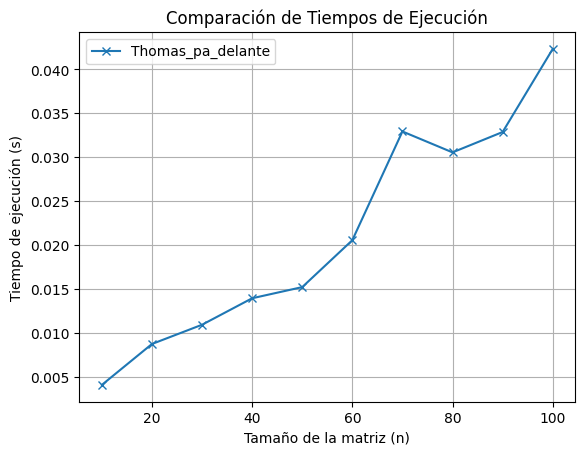

In [ ]:
# TThomas_pa_delante
def Thomas_pa_delante(DP, DS, DI, b):
    n = len(DP)
    x = np.zeros(n)

    # Eliminación hacia adelante
    for i in range(1, n):
        DP[i] = DP[i] - (DI[i-1] / DP[i-1]) * DS[i-1]
        b[i] = b[i] - (DI[i-1] / DP[i-1]) * b[i-1]

    # Sustitución hacia adelante
    x[0] = b[0] / DP[0]
    for i in range(1, n):
        x[i] = (b[i] - DS[i-1] * x[i-1]) / DP[i]  # Cambiar DS[i] por DS[i-1]

    return x

sizes = range(10, 101, 10)

Thomas_pa_delante_times = []

for n in sizes:
    DP = 2 * np.ones(n)
    DS = -1 * np.ones(n-1)  # DS debe tener tamaño n-1
    DI = -1 * np.ones(n-1)  # DI debe tener tamaño n-1
    b = np.ones(n)

    # Thomas Forward
    Thomas_pa_delante_times.append(timeit.timeit(lambda: Thomas_pa_delante(DP.copy(), DS.copy(), DI.copy(), b.copy()), number=100))

plt.plot(sizes, Thomas_pa_delante_times, marker='x', label='Thomas_pa_delante')

plt.xlabel('Tamaño de la matriz (n)')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('Comparación de Tiempos de Ejecución')
plt.legend()
plt.grid()
plt.show()
